# House Price Prediction with Non-Linear Regression

### BACKGROUND

This is a house price listing data of Australia

**Column list:**

* neighbourhood_cleansed -information on the neighborhood.
* property_type - The type of property that is being listed.
* room_type - The type of room that is available for rent
* bathrooms - The count of bathrooms available (e.g., 1, 2, 1.5).  
* bedrooms - The count of bedrooms available (e.g., 0, 1, 2).
* beds - The count of beds available in the rental (e.g., 0, 1, 2).
* price - The cost of the rental per night in USD.
* square_meters - area of the room

**For this we will be taking a date of House prices list in Australia**

### PROBLEM STATEMENT

How well the features in the dataset can predict the prices of houses in different areas of Australia?

Imported the necessary packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
raw_data=pd.read_csv('python_project_2.csv')

In [3]:
raw_data.head()

,id,country,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
0,1451202,Australia,NSW,BALLINA SHIRE COUNCIL,Guest suite,15.00,"$3,181.86",Entire home/apt,1.0,1,1.0
1,2345959,Australia,NSW,BALLINA SHIRE COUNCIL,House,17.50,"$2,136.14",Private room,4.0,4,3.0
2,26087141,Australia,NSW,BALLINA SHIRE COUNCIL,House,16.78,"$3,576.04",Private room,1.0,1,1.0
3,26314590,Australia,NSW,BALLINA SHIRE COUNCIL,House,17.35,"$2,635.39",Private room,1.0,1,1.0
4,17031042,Australia,NSW,BALLINA SHIRE COUNCIL,Guesthouse,16.44,"$3,352.24",Private room,1.0,1,2.0


In [4]:
raw_data.dtypes

id                          int64
country                    object
state                      object
neighbourhood_cleansed     object
property_type              object
square_meters             float64
price                      object
room_type                  object
bathrooms                 float64
bedrooms                    int64
beds                      float64
dtype: object

Let us remove the dollar '$' & ',' from *price* feature and change its data type to float

In [5]:
try:
    raw_data['price'] = raw_data['price'].str.replace('$', '')
except:
    print("'$' Already replaced")

try:
    raw_data['price'] = raw_data['price'].str.replace(',', '')
except:
    print("',' Already replaced")
    
raw_data['price'] = raw_data['price'] .astype('float')

In [6]:
print(raw_data['country'].value_counts())
print("-----------------------------------------")
print(raw_data['neighbourhood_cleansed'].value_counts())
print("-----------------------------------------")
print(raw_data['property_type'].value_counts())
print("-----------------------------------------")
print(raw_data['room_type'].value_counts())
print("-----------------------------------------")
print(raw_data['state'].value_counts())

country
Australia    3962
Name: count, dtype: int64
-----------------------------------------
neighbourhood_cleansed
BYRON SHIRE COUNCIL        2490
TWEED SHIRE COUNCIL         879
BALLINA SHIRE COUNCIL       451
LISMORE CITY COUNCIL        124
RICHMOND VALLEY COUNCIL      18
Name: count, dtype: int64
-----------------------------------------
property_type
House           2415
Apartment        962
Guest suite      260
Guesthouse       219
Camper/RV         42
Loft              23
Nature lodge      22
Other             19
Name: count, dtype: int64
-----------------------------------------
room_type
Entire home/apt    3217
Private room        742
Shared room           3
Name: count, dtype: int64
-----------------------------------------
state
NSW                3598
New South Wales     115
QLD                  45
Nsw                   4
nsw                   3
Qld                   2
Queensland            1
queensland            1
Name: count, dtype: int64


Clearly, the naming convention for states needs to be cleaned. There are only two states of Australia in the dataset- New South Wales & Queensland<br>
Let us name Queensland as QLD and New South Wales as NSW for simplicity.

In [7]:
raw_data['state']=raw_data['state'].str.upper()
raw_data['state'] = raw_data['state'].replace({'QUEENSLAND':'QLD','NEW SOUTH WALES':'NSW'})

Let us check the NULL values

In [8]:
raw_data.count()

id                        3962
country                   3962
state                     3769
neighbourhood_cleansed    3962
property_type             3962
square_meters             3962
price                     3962
room_type                 3962
bathrooms                 3962
bedrooms                  3962
beds                      3961
dtype: int64

It seems there are NULL values in some of the features
The NULL values in ***bathrooms*** and ***bedrooms*** can be dropped as there are only 2-3 NULL values.

In case of ***state*** let us check if the ***neighborhood*** areas are uniquie to each state. Then in that case, we can replace the NULL values in ***state column*** based on neighbourhoods.

In [9]:
try:
    raw_data=raw_data.dropna(subset=['bedrooms','bathrooms'])
except: 
    print("NULL values Already dropped")   

In [10]:
#The count of neihgbourhoods whoose state is NULL
raw_data[raw_data['state'].isnull()]['neighbourhood_cleansed']. value_counts()

neighbourhood_cleansed
TWEED SHIRE COUNCIL      135
BYRON SHIRE COUNCIL       33
BALLINA SHIRE COUNCIL     23
LISMORE CITY COUNCIL       2
Name: count, dtype: int64

In [11]:
#Are the neighbourhoods which have NULL values in state variable are unique to its state?
raw_data.groupby(["state","neighbourhood_cleansed"]).count()['country']

state  neighbourhood_cleansed 
NSW    BALLINA SHIRE COUNCIL       428
       BYRON SHIRE COUNCIL        2456
       LISMORE CITY COUNCIL        122
       RICHMOND VALLEY COUNCIL      18
       TWEED SHIRE COUNCIL         696
QLD    BYRON SHIRE COUNCIL           1
       TWEED SHIRE COUNCIL          48
Name: country, dtype: int64

We can see that the the *neighbourhoods* are not unique in each *state* and count of QLD is also less compared to NSW <br>
<br>
After some Google search, I found that Tweed Shire Council lies in NSW adjacent to the border with QLD and Byron Shire Council is in NSW.<br>
So, we can say that all the neighbourhood areas mentioned in the dataset lies in NSW and we can replace the NULL values of *state* variable with NSW.

In [12]:
raw_data['state'] = raw_data.state.replace(np.NaN, 'NSW')

In [13]:
raw_data.describe()

,id,square_meters,price,bathrooms,bedrooms,beds
count,3.962000e+03,3962.000000,3962.000000,3962.000000,3962.000000,3961.000000
mean,1.908533e+07,32.564677,4553.188178,1.637683,2.264260,2.985862
std,9.672440e+06,12.094013,2231.063681,0.832340,1.368148,1.994387
min,2.982000e+04,1.000000,-137.780000,0.000000,0.000000,0.000000
25%,1.151423e+07,24.732500,3113.080000,1.000000,1.000000,1.000000
50%,2.025634e+07,29.740000,4040.720000,1.000000,2.000000,3.000000
75%,2.730823e+07,35.285000,5298.202500,2.000000,3.000000,4.000000
max,3.429629e+07,87.680000,16569.050000,9.000000,12.000000,18.000000


**There were couple of observations from the above chart which needs to be taken care of**

- Typically *beds* and *bedrooms* should be the same,but we can see that the values in both the variables
  differ a bit. We can select one at a time in our dataset if required.
- Need to trim outliers in price
- Need to trim square meters (like removing less than 5 sq meters)

[array([3113.08, -137.78]), array([5298.2025, 8575.05  ])]

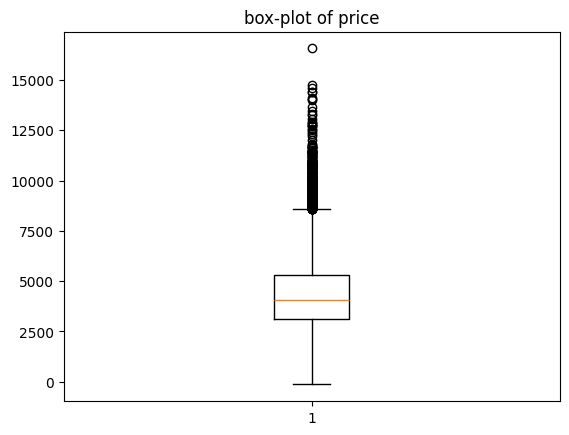

In [14]:
# extracting the lower and upper limit from box plot to remove the outliers 
plt.title("box-plot of price")
price_bxplot=plt.boxplot(x=raw_data['price'])
[item.get_ydata() for item in price_bxplot['whiskers']]


[array([24.7325,  9.    ]), array([35.285, 51.09 ])]

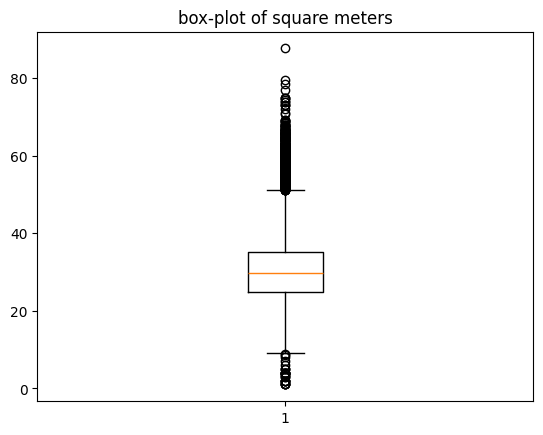

In [15]:
# extracting the lower and upper limit from box plot to remove the extreme outliers in square meters
plt.title("box-plot of square meters")
meters_bxplot=plt.boxplot(x=raw_data['square_meters'])
[item.get_ydata() for item in meters_bxplot['whiskers']]


***This graph is to visualize the distribution of a dataset and identify potential outliers. The lower and upper limits of the box plot's whiskers can be used to determine the range within which data points are considered non-outliers.***

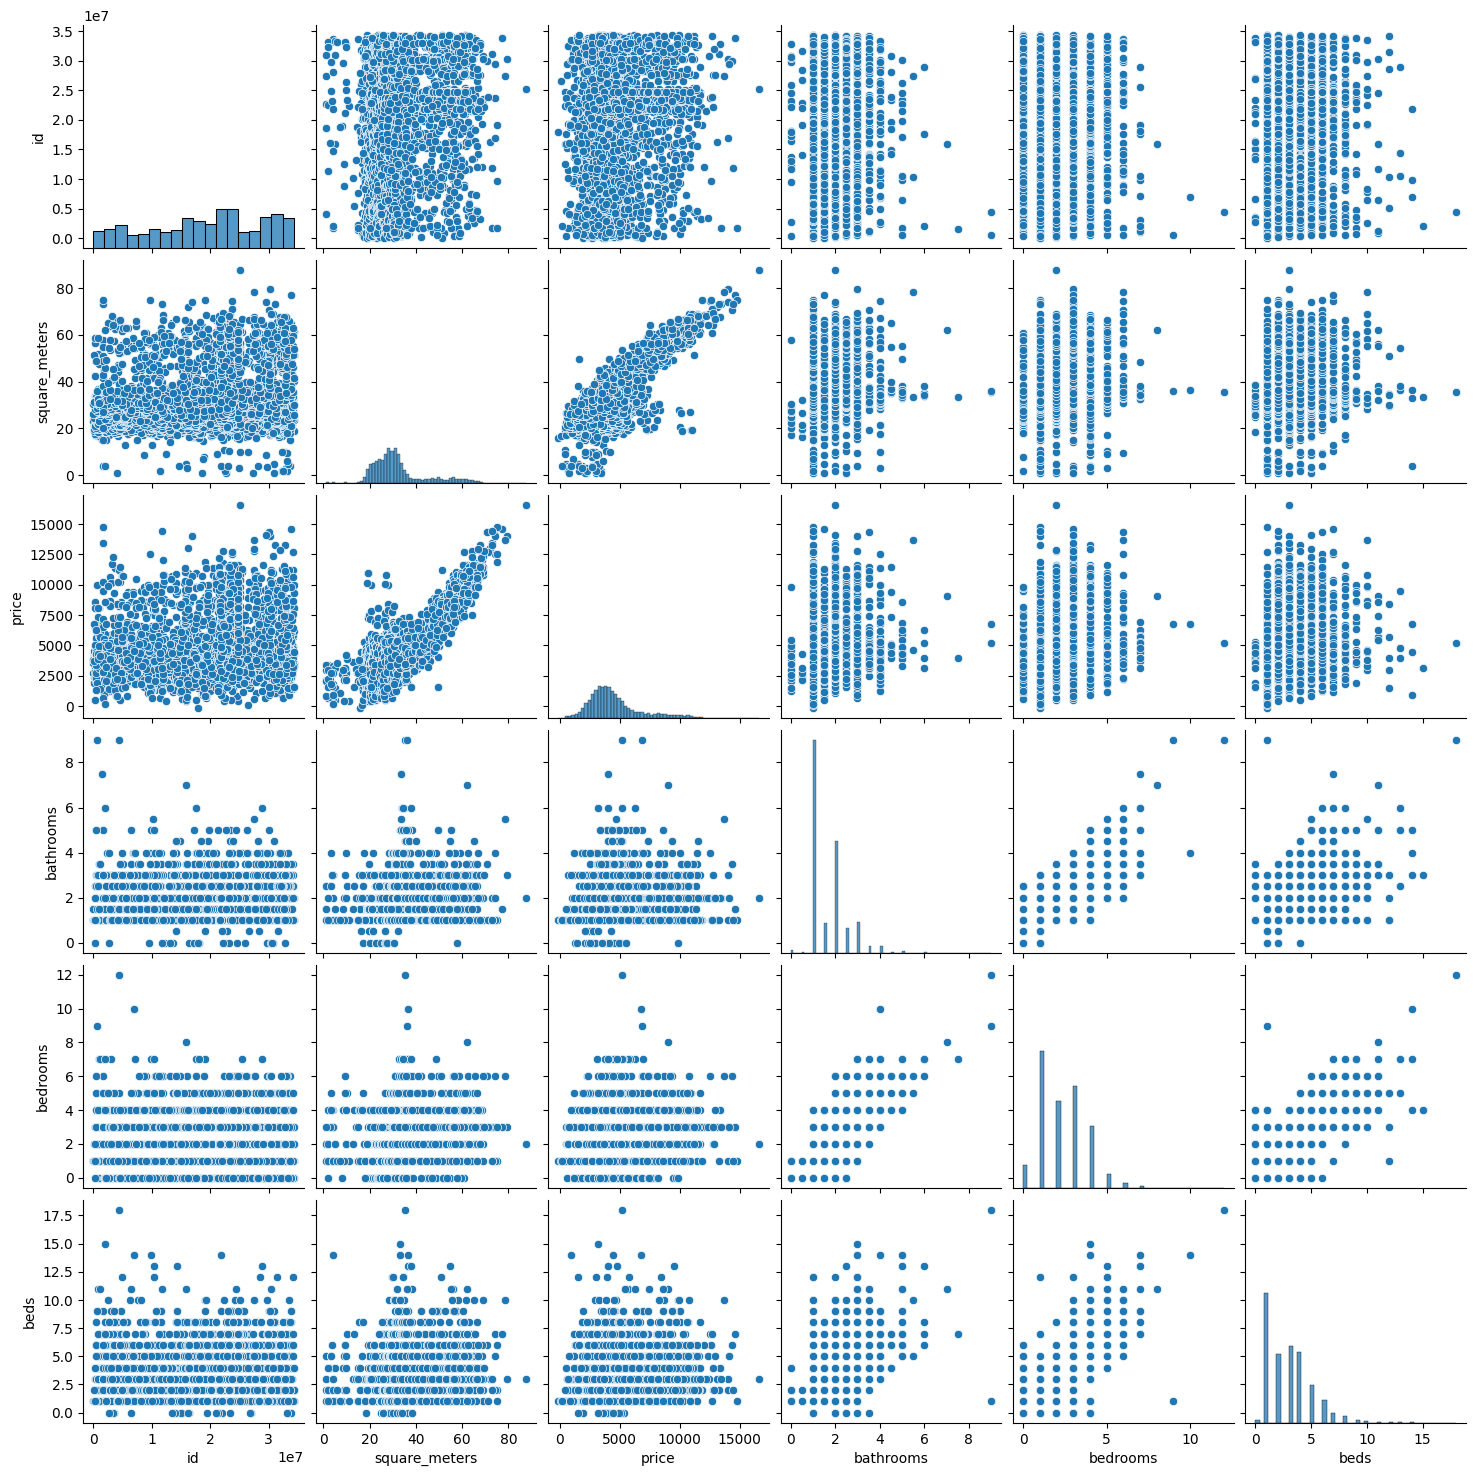

In [16]:
sns.pairplot(raw_data)

**Price Outliers**<br>
Let us trim the price outliers on two conditions mentioned below. Later we can keep only one based on performance.
- CONDITION 1-Trim based on box plot
- CONDITION 2-Trim by removing only 1 percent outliers from both the extremes<br>
Let us proceed with CONDITION 1 and check the behavior with CONDITION 2 as well.

**Square Meter Outliers**<br>
Extracted the outliers from box plot above and went ahead with trimming<br>

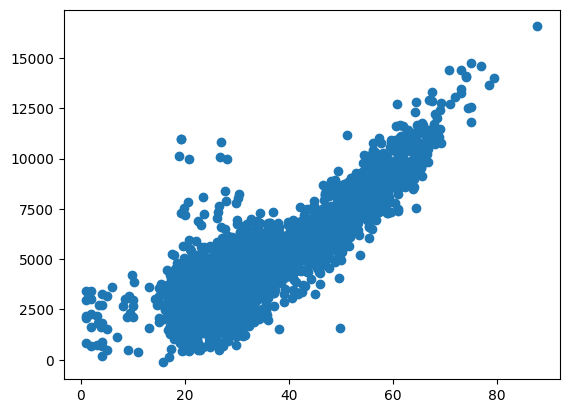

In [17]:
plt.scatter(raw_data['square_meters'],raw_data['price'])

**Regression Equation:**

The regression equation you've implemented is a quadratic polynomial with multiple variable
s:*⋅w+Ey=A⋅x2+B⋅x+CD******⋅w+E

## Prediction with Non-Linear Regression

### Introduction

In this project, we aim to predict house prices using a non-linear regression model with a quadratic polynomial of degree 2. The goal is to capture more complex relationships between features such as square meters, bathrooms, bedrooms, and house prices.


ents.

### Normalization

Features are normalized using `StandardScaler` to ensure consistent scaling across vari
It is imported from **sklearn library**abmtiions)


### Polynomial Regression

We employ a quadratic polynomial regression model to better capture non-linear patterns in the data.

$$ y = A \cdot x^2 + B \cdot x + C \cdot z + D \cdot w + E $$

Here:

    y is the predicted house price.
    x represents the square meters of the house.
    z represents the number of bathrooms.
    w represents the number of bedrooms.
    A,B,C,D and E are the coefficients.


## Approach

### Data Description

- Features:
  - Square meters
  - Number of bathrooms
  - Number of bedrooms

    This is the data in the List of Houses in Australia


### Cost Function

The mean squared error (MSE) is minimized during training to improve the accuracy of predictions.
Here,
    A,B,C,D andE are the variables which stores the 

$$ J(A, B, C, D, E) = \frac{1}{2m} \sum_{i=1}^{m} (h_i - y_i)^2 $$


In [18]:
    def compute_cost(self):
        m = len(self.x)
        predictions = self.A * self.x ** 2 + self.B * self.x + self.C * self.z + self.D * self.w + self.E
        squared_errors = (predictions - self.y) ** 2
        cost = 1 / (2 * m) * np.sum(squared_errors)
        return cost


We have created the sets **A_set, B_set, C_set, D_set, E_set** to Store the history of coefficients **A, B, C, D, and E**, respectively, throughout the training process.
  cost_values: Stores the history of the cost function values at each iteration. This set allows you to track how well the model is fitting the data over time.

The information stored in these sets can be useful for analysis and visualization. For example, you can use this historical data to create plots showing the convergence of coefficients and the decreasing trend of the cost function over iterations.

In [19]:
x =raw_data['square_meters'].tolist()
x = np.array(x)[:, np.newaxis]
x

array([[15.  ],
       [17.5 ],
       [16.78],
       ...,
       [60.97],
       [65.48],
       [56.66]])

In [20]:
y =raw_data['price'].tolist()
y = np.array(y)[:, np.newaxis]
y

array([[3181.86],
       [2136.14],
       [3576.04],
       ...,
       [7405.09],
       [9145.52],
       [8171.36]])

In [21]:
z =raw_data['bedrooms'].tolist()
z = np.array(z)[:, np.newaxis]
z

array([[1],
       [4],
       [1],
       ...,
       [4],
       [6],
       [3]])

In [22]:
w =raw_data['bedrooms'].tolist()
w = np.array(w)[:, np.newaxis]
w

array([[1],
       [4],
       [1],
       ...,
       [4],
       [6],
       [3]])

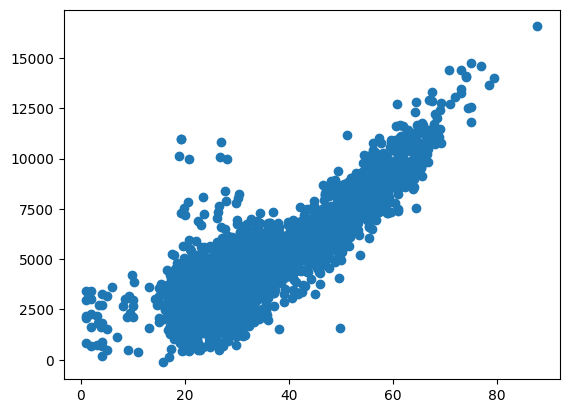

In [23]:
plt.scatter(x,y)

This is the Plotting of the Points given in the CSV file : Between `x and y`

### Background:

    Objective: Minimize a cost function during machine learning model training.
    Cost Function: Measures the difference between predicted and actual values### .

Gradient Descent:

    Optimization Algorithm: Iteratively adjusts parameters to minimize the cost function.
    Direction of Steepest Descent: Parameters updated opposite to the gradient of the cost fun### ction.

Partial Derivatives:

    Definition: Measure how a function changes with respect to one variable while others are constant.
    In ML Context: Cost function depends on multiple parameters (coefficients).

## Partial Derivatives for Gradient Descent for each coeffient 
$ \frac{\partial J}{\partial A} = \frac{1}{m} \sum_{i=1}^{m} (h_i - y_i) \cdot x_i^2 $

$\frac{\partial J}{\partial B} = \frac{1}{m} \sum_{i=1}^{m} (h_i - y_i) \cdot x_i$

$\frac{\partial J}{\partial C} = \frac{1}{m} \sum_{i=1}^{m} (h_i - y_i) \cdot z_i$

$\frac{\partial J}{\partial D} = \frac{1}{m} \sum_{i=1}^{m} (h_i - y_i) \cdot w_i$

$\frac{\partial J}{\partial E} = \frac{1}{m} \sum_{i=1}^{m} (h_i - y_i)$


In [24]:
    def compute_gradient(self):
        predictions = self.A * self.x ** 2 + self.B * self.x + self.C * self.z + self.D * self.w + self.E
        errors = predictions - self.y
        dj_da = np.sum(errors * self.x ** 2) / len(self.x)
        dj_db = np.sum(errors * self.x) / len(self.x)
        dj_dc = np.sum(errors * self.z) / len(self.x)
        dj_dd = np.sum(errors * self.w) / len(self.x)
        dj_de = np.sum(errors) / len(self.x)
        return dj_da, dj_db, dj_dc, dj_dd, dj_de


## Model

We've implemented a non-linear regression class using gradient descent to optimize the coefficients for the quadratic polynomial.
In the context of your non-linear regression project, the goal of gradient descent is to find the values for the coefficients (A,B,C,D,E) that result in the minimum cost.


### Gradient Descent

Coefficients are iteratively updated using gradient descent to minimize the cost function.
It will update the coefficients y using gradient descent

$
\begin{align*}
A & := A - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_i - y_i) \cdot x_i^2 \\
B & := B - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_i - y_i) \cdot x_i \\
C & := C - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_i - y_i) \cdot z_i \\
D & := D - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_i - y_i) \cdot w_i \\
E & := E - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_i - y_i)
\end{align*}
$



In [25]:
def fit(self, x, y, z, w):
    self.x, self.z, self.w = self.normalize_data(x, z, w)
    self.y = y
    cost = math.inf
    while np.abs(cost - self.compute_cost()) > 1e-10:
        self.A_set.append(self.A)
        self.B_set.append(self.B)
        self.C_set.append(self.C)
        self.D_set.append(self.D)
        self.E_set.append(self.E)
        cost = self.compute_cost()
        self.cost_values.append(cost)

        dj_da, dj_db, dj_dc, dj_dd, dj_de = self.compute_gradient()

        self.A -= dj_da * self.alpha
        self.B -= dj_db * self.alpha
        self.C -= dj_dc * self.alpha
        self.D -= dj_dd * self.alpha
        self.E -= dj_de * self.alpha

        self.A_set.append(self.A)
        self.B_set.append(self.B)
        self.C_set.append(self.C)
        self.D_set.append(self.D)
        self.E_set.append(self.E)


### Goal:

    Minimize the difference between predicted and true values for generalization.

### Accuracy Calculation:
-   Set a threshold for binary classification (e.g., threshold = 0.5
-    Create binary arrays for predictions and actual values based on the thresho
-     Compare binary predictions with binary actual values element-w
- 
    Calculate accuracy by taking the mean of the resulting boolean array.

In [26]:
def calculate_accuracy(self, predictions, actual):
    # Assume a threshold for binary classification (adjust as needed)
    threshold = 0.5
    binary_predictions = predictions > threshold
    binary_actual = actual > threshold

    accuracy = np.mean(binary_predictions == binary_actual)
    return accuracy


train_accuracy = self.calculate_accuracy(train_predictions, y_train)<br>
test_accuracy = self.calculate_accuracy(test_predictions, y_test)</div>

### Accuracy:

    Accuracy is a metric that measures the percentage of correct predictions made by the model. It is often calculated as the ratio of the number of correct predictions to the total number of prediction
<br>

$$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}  $$
ions​

    In the context of regression, where predictions are continuous values, accuracy might be determined using a threshold or by considering a range around the true values.

### Prediction Process:
-   The prediction process involves using the trained non-linear regression model to estimate the target variable (house price) for new input value
-    Before making predictions, it's crucial to normalize the input features (square meters, bathrooms, bedrooms) using the statistics (mean and standard deviation) calculated during traini
-     The normalized inputs are then used in the regression equation to compute the predicted house pr
- 
    The regression equation is defined as follows: prediction=A⋅square meters2+B⋅square meters+C⋅bathrooms+D⋅bedrooms+Eprediction=A⋅square meters2+B⋅square meters+C⋅bathrooms+D⋅bedroo
- 
    The predicted value is then returned as the output of the prediction process.

In [27]:
def predict(self, x, z, w):
    x_normalized = (x - self.x_stats[0]) / self.x_stats[1]
    z_normalized = (z - self.z_stats[0]) / self.z_stats[1]
    w_normalized = (w - self.w_stats[0]) / self.w_stats[1]

    prediction = self.A * x_normalized ** 2 + self.B * x_normalized + self.C * z_normalized + self.D * w_normalized + self.E

    return prediction

## Results and Visualization

### Model Training

The training process refines coefficients through multiple iterations until convergence.

### Visualization

Visualizations include a fitted quadratic curve on the scatter plot of the data and a plot of cost values over iterations.

## Example Usage

We apply the model to a real dataset, 'australia.csv', involving square meters, bathrooms, bedrooms, and house prices.

```python



Now for the data to train our Regression to be trained, let us create some variables **x,y,z and w** that represents the data of columns such as `square_meters` , `price` , `bathrooms` and `bedrooms` respectively in the give Australian houses data in the CSV file

Now we will combine all and create a class for Non Linear regression

In [502]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

class NonLinearRegression:
    def __init__(self, alpha=0.01):
        self.alpha = alpha
        self.A = 0
        self.B = 0
        self.C = 0
        self.D = 0
        self.E = 1
        self.cost_values = []
        self.A_set = []
        self.B_set = []
        self.C_set = []
        self.D_set = []
        self.E_set = []
        self.x_stats = None
        self.z_stats = None
        self.w_stats = None

    def normalize_data(self, x, z, w):
        x_mean, x_std = np.mean(x), np.std(x)
        z_mean, z_std = np.mean(z), np.std(z)
        w_mean, w_std = np.mean(w), np.std(w)

        self.x_stats = (x_mean, x_std)
        self.z_stats = (z_mean, z_std)
        self.w_stats = (w_mean, w_std)

        x_scaled = (x - x_mean) / x_std
        z_scaled = (z - z_mean) / z_std
        w_scaled = (w - w_mean) / w_std

        return x_scaled, z_scaled, w_scaled, (x_mean, x_std), (z_mean, z_std), (w_mean, w_std)

    def train_test_split(self, x, y, z, w, train_size=3000):
        x_train, x_test = x[:train_size], x[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]
        z_train, z_test = z[:train_size], z[train_size:]
        w_train, w_test = w[:train_size], w[train_size:]
        
        return x_train, y_train, z_train, w_train, x_test, y_test, z_test, w_test


    def compute_cost(self):
        m = len(self.x)
        predictions = self.A * self.x ** 2 + self.B * self.x + self.C * self.z + self.D * self.w + self.E
        squared_errors = (predictions - self.y) ** 2
        cost = 1 / (2 * m) * np.sum(squared_errors)
        return cost

    def compute_gradient(self):
        predictions = self.A * self.x ** 2 + self.B * self.x + self.C * self.z + self.D * self.w + self.E
        errors = predictions - self.y
        dj_da = np.sum(errors * self.x ** 2) / len(self.x)
        dj_db = np.sum(errors * self.x) / len(self.x)
        dj_dc = np.sum(errors * self.z) / len(self.x)
        dj_dd = np.sum(errors * self.w) / len(self.x)
        dj_de = np.sum(errors) / len(self.x)
        return dj_da, dj_db, dj_dc, dj_dd, dj_de

    def fit(self, x, y, z, w, test_size=0.2):
        self.x, self.z, self.w, x_stats, z_stats, w_stats = self.normalize_data(x, z, w)
        self.y = y
        x_train, y_train, z_train, w_train, x_test, y_test, z_test, w_test = self.train_test_split(self.x, y, self.z, self.w, train_size=3000)
        cost = math.inf
        while np.abs(cost - self.compute_cost()) > 0.1:
            self.A_set.append(self.A)
            self.B_set.append(self.B)
            self.C_set.append(self.C)
            self.D_set.append(self.D)
            self.E_set.append(self.E)
            cost = self.compute_cost()
            self.cost_values.append(cost)

            dj_da, dj_db, dj_dc, dj_dd, dj_de = self.compute_gradient()

            self.A -= dj_da * self.alpha
            self.B -= dj_db * self.alpha
            self.C -= dj_dc * self.alpha
            self.D -= dj_dd * self.alpha
            self.E -= dj_de * self.alpha

        # Print accuracy and other information
        train_predictions = self.A * x_train ** 2 + self.B * x_train + self.C * z_train + self.D * w_train + self.E
        test_predictions = self.A * x_test ** 2 + self.B * x_test + self.C * z_test + self.D * w_test + self.E

        train_accuracy = self.calculate_accuracy(train_predictions, y_train)
        test_accuracy = self.calculate_accuracy(test_predictions, y_test)

        print("Training Accuracy:", train_accuracy)
        print("Testing Accuracy:", test_accuracy)

    def predict(self, x, z, w):
        x_normalized = (x - self.x_stats[0]) / self.x_stats[1]
        z_normalized = (z - self.z_stats[0]) / self.z_stats[1]
        w_normalized = (w - self.w_stats[0]) / self.w_stats[1]

        prediction = self.A * x_normalized ** 2 + self.B * x_normalized + self.C * z_normalized + self.D * w_normalized + self.E

        return prediction

    def display_predicted_prices(self, x_values, z_value, w_value):
        x_normalized = (x_values - self.x_stats[0]) / self.x_stats[1]
        z_normalized = (z_value - self.z_stats[0]) / self.z_stats[1]
        w_normalized = (w_value - self.w_stats[0]) / self.w_stats[1]

        # Predict prices using the trained regression model
        predicted_prices = self.A * x_normalized ** 2 + self.B * x_normalized + self.C * z_normalized + self.D * w_normalized + self.E
        # Display the predicted prices
        print("\nPredicted Prices:")
        for i in range(len(x_values)):
            print(f"Square Meters: {x_values[i]}, Bathrooms: {z_value}, Bedrooms: {w_value}, Predicted Price: {predicted_prices[i]}")


    
    def calculate_accuracy(self, predictions, actual):
        # Assume a threshold for binary classification (adjust as needed)
        threshold = 0.5
        binary_predictions = predictions > threshold
        binary_actual = actual > threshold

        accuracy = np.mean(binary_predictions == binary_actual)
        return accuracy

    def get_coefficients(self):
        return self.A, self.B, self.C, self.D, self.E

    def show_data_sets(self):
        return self.A_set, self.B_set, self.C_set, self.D_set, self.E_set

    def display_coefficients(self):
        coefficients = self.get_coefficients()
        print("Coefficients:", coefficients)

    def plot_results(self):
        plt.figure(figsize=(12, 5))

        x_values = np.linspace(min(self.x), max(self.x), 100).reshape(-1, 1)
        z_values = np.mean(self.z)
        w_values = np.mean(self.w)
        y_values = self.A * x_values ** 2 + self.B * x_values + self.C * z_values + self.D * w_values + self.E

        plt.subplot(1, 2, 1)
        plt.scatter(self.x, self.y, label='Data Points', color='blue', marker='o')
        plt.plot(x_values, y_values, label='Final Regression', color='red', linewidth=2)
        plt.title('Scatter Plot')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(self.cost_values, label='Cost')
        plt.title('Cost Values Over Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.legend()

        plt.tight_layout()
        plt.show()

    def plot_predicted_prices(self, x_values_set, z_values_set, w_values_set):
        plt.figure(figsize=(8, 5))
    
        all_predicted_prices = []
            
        for i in range(len(x_values_set)):
            x_values = x_values_set[i]
            z_value = z_values_set[i]
            w_value = w_values_set[i]
    
            x_normalized = (x_values - self.x_stats[0]) / self.x_stats[1]
            z_normalized = (z_value - self.z_stats[0]) / self.z_stats[1]
            w_normalized = (w_value - self.w_stats[0]) / self.w_stats[1]
    
            predicted_prices = self.A * x_normalized ** 2 + self.B * x_normalized + self.C * z_normalized + self.D * w_normalized + self.E
            all_predicted_prices.extend(predicted_prices)
    
            x_values_2 = np.linspace(min(self.x), max(self.x), 100).reshape(-1, 1)
            z_values_2 = np.mean(self.z)
            w_values_2 = np.mean(self.w)
            y_values = self.A * x_values_2 ** 2 + self.B * x_values_2 + self.C * z_values_2 + self.D * w_values_2 + self.E
    
            plt.scatter(x_normalized, predicted_prices, label=f'Set {i + 1}', marker='o')
    
        plt.plot(x_values_2, y_values, label='Final Regression', color='red', linewidth=2)
        plt.title('Predicted Prices vs Square Meters')
        plt.xlabel('Square Meters')
        plt.ylabel('Predicted Prices')
        plt.legend()
        plt.show()
        
        return all_predicted_prices


In [503]:
# Example usage
# Assuming you have a CSV file named 'your_data.csv' with columns 'x', 'y', 'z', 'w'
data = pd.read_csv('python_project_2.csv')
data.dropna(subset=['square_meters','price','bathrooms','bedrooms'])


,id,country,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
0,1451202,Australia,NSW,BALLINA SHIRE COUNCIL,Guest suite,15.00,"$3,181.86",Entire home/apt,1.0,1,1.0
1,2345959,Australia,NSW,BALLINA SHIRE COUNCIL,House,17.50,"$2,136.14",Private room,4.0,4,3.0
2,26087141,Australia,NSW,BALLINA SHIRE COUNCIL,House,16.78,"$3,576.04",Private room,1.0,1,1.0
3,26314590,Australia,NSW,BALLINA SHIRE COUNCIL,House,17.35,"$2,635.39",Private room,1.0,1,1.0
4,17031042,Australia,NSW,BALLINA SHIRE COUNCIL,Guesthouse,16.44,"$3,352.24",Private room,1.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...
3957,23219853,Australia,NSW,TWEED SHIRE COUNCIL,House,62.32,"$9,308.68",Entire home/apt,4.0,6,6.0
3958,27612762,Australia,QLD,TWEED SHIRE COUNCIL,Apartment,56.20,"$7,565.43",Entire home/apt,2.0,3,3.0
3959,32669144,Australia,NaN,TWEED SHIRE COUNCIL,House,60.97,"$7,405.09",Entire home/apt,2.0,4,5.0
3960,32115978,Australia,NSW,TWEED SHIRE COUNCIL,House,65.48,"$9,145.52",Entire home/apt,2.5,6,7.0


In [504]:
try:
    data['price'] = data['price'].str.replace('$', '')
except:
    print("'$' Already replaced")

try:
    data['price'] = data['price'].str.replace(',', '')
except:
    print("',' Already replaced")
    
data['price'] = data['price'] .astype('float')

In [505]:
x = data['square_meters'].values.reshape(-1, 1)
y = data['price'].values.reshape(-1, 1)
z = data['bathrooms'].values.reshape(-1, 1)
w = data['bedrooms'].values.reshape(-1, 1)

In [506]:
regression_model = NonLinearRegression()
regression_model.fit(x, y, z, w)

Training Accuracy: 0.9996666666666667
Testing Accuracy: 1.0


Coefficients: (323.3586548069665, 1520.3223307494175, 6.299027842105668, 11.674157993614818, 4228.485744827283)


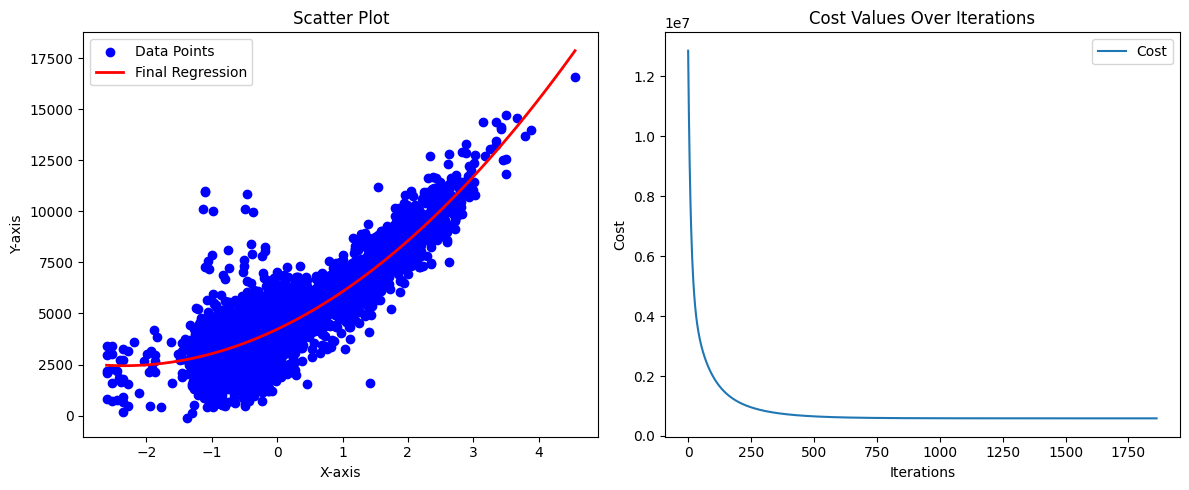

In [507]:
regression_model.display_coefficients()
regression_model.plot_results()

### Predict Prices:
  Choose specific values for square meters, bathrooms, and bedroom<br>s   Use the model to predict prices for the chosen values.

### Plot Predicted Prices:
  Plot the original data point<br>s   Plot the predicted prices for chosen values with a regression line.

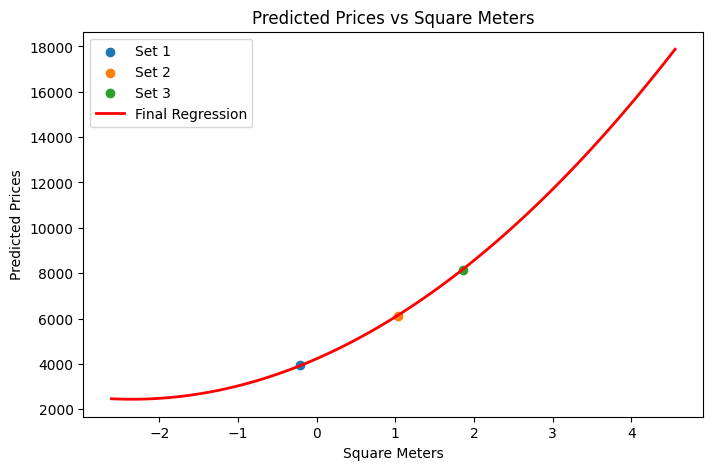


Predicted Prices:
Square Meters: [30], Bathrooms: (2, 1, 3), Bedrooms: (3, 1, 1), Predicted Price: [3929.60910375 3904.97251399 3920.11012413]
Square Meters: [45], Bathrooms: (2, 1, 3), Bedrooms: (3, 1, 1), Predicted Price: [6142.88585528 6118.24926552 6133.38687566]
Square Meters: [55], Bathrooms: (2, 1, 3), Bedrooms: (3, 1, 1), Predicted Price: [8171.23581822 8146.59922845 8161.73683859]


In [508]:
# Predict prices for specific values and plot the results
x_values_to_predict = np.array([30, 45,55]).reshape(-1, 1)
z_value_to_predict = 2,1,3
w_value_to_predict = 3,1,1

regression_model.plot_predicted_prices(x_values_to_predict, z_value_to_predict, w_value_to_predict)
regression_model.display_predicted_prices(x_values_to_predict, z_value_to_predict, w_value_to_predict)

In [441]:
x.shape[0]

3962

In [442]:
x.shape[0]

3962

In [443]:
y.shape[0]

3962

**It represents the Regression line for this Data**

Here The coefficients are 
<center>a=292.6024218837276, b=1619.6579926699662, c=14.387864245359586, d=-12.025053931878345, e=2714.3911545482797 </center>

Prediction happens when there is a new data of the house come into picture
So we have to Predict the House for which there are other weights(variables) known to us

In [447]:
new_data = pd.DataFrame({'square_meters': [20, 30, 40], 'bathrooms': [2, 3, 4], 'bedrooms': [2, 4, 5]})

In this new data we know the other three weights so we can **predict** the House price with this data

In [448]:
predictions = regression_model.predict(new_data['square_meters'].values.reshape(-1, 1),
                                      new_data['bathrooms'].values.reshape(-1, 1),
                                      new_data['bedrooms'].values.reshape(-1, 1))
print("Predictions:")
print(predictions)

Predictions:
[[2998.38950563]
 [3945.71180117]
 [5326.76590723]]


So the Predictions are `2998.38950563,
[3945.7118011, [5326.765907]]` accordingly

### Sklearn library

We are implementing a Non-linear polynomial regression with Sikit learn library 

We are using Polynomial Regression, a type of regression that uses polynomial features to capture nonlinear relationships between the independent and dependent variables. Additionally, the scikit-learn library is utilized to perform various tasks related to machine learning. Let's break down the code and explain its usage:mance.

#### Library Imports:
    Import necessary libraries for data manipulation, numerical operations, visualization, and machine learning tasks.

In [456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### Data Loading and Preprocessing:

    Load the dataset from a CSV file and handle missing values.
    Preprocess the 'price' column by removing symbols and converting it to a float.

In [449]:
# Example data loading (replace this with your actual data)
data = pd.read_csv('python_project_2.csv')
data = data.dropna(subset=['square_meters', 'price', 'bedrooms', 'bathrooms'])

try:
    data['price'] = data['price'].str.replace('$', '')
except:
    print("'$' Already replaced")

try:
    data['price'] = raw_data['price'].str.replace(',', '')
except:
    print("',' Already replaced")
    
data['price'] = raw_data['price'] .astype('float')

',' Already replaced


#### Feature Extraction:

    Extract features ('square_meters') and the target variable ('price').

In [450]:
X = data['square_meters'].values.reshape(-1, 1)
y = data['price'].values

#### Data Splitting:

    Split the data into training and testing se.ts

In [451]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Polynomial Regression:

    Set the degree of the polynomial and use PolynomialFeatures to generate polynomial features.
    Train a linear regression model using the polynomial features.

In [453]:
# Polynomial regression
degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


In [454]:
y_pred = poly_regression.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1115879.993629587


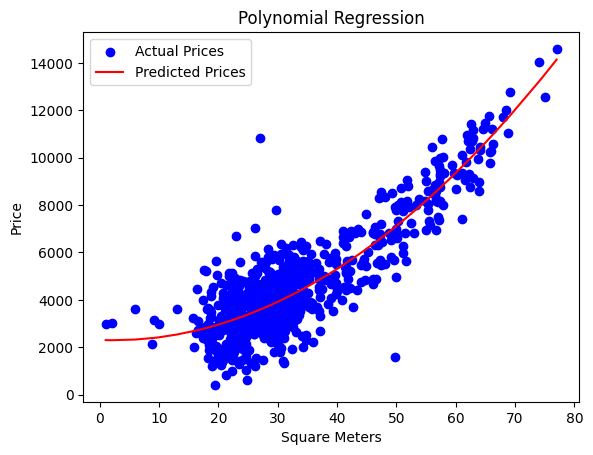

In [455]:
plt.scatter(X_test.ravel(), y_test, color='blue', label='Actual Prices')
sorted_order = np.argsort(X_test.ravel(), axis=0)
plt.plot(X_test.ravel()[sorted_order], y_pred.ravel()[sorted_order], color='red', label='Predicted Prices')
plt.title('Polynomial Regression')
plt.xlabel('Square Meters')
plt.ylabel('Price')
plt.legend()
plt.show()


In [87]:
data

,id,country,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
0,13048065,Australia,NSW,BALLINA SHIRE COUNCIL,House,1.55,2835.964028,Private room,1.0,1.0,1.0
1,1451202,Australia,NSW,BALLINA SHIRE COUNCIL,Guest suite,15.00,3181.855226,Entire home/apt,1.0,1.0,1.0
2,2345959,Australia,NSW,BALLINA SHIRE COUNCIL,House,17.50,2136.137399,Private room,4.0,4.0,3.0
3,26087141,Australia,NSW,BALLINA SHIRE COUNCIL,House,16.78,3576.042267,Private room,1.0,1.0,1.0
4,26314590,Australia,NSW,BALLINA SHIRE COUNCIL,House,17.35,2635.392647,Private room,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3968,23219853,Australia,NSW,TWEED SHIRE COUNCIL,House,62.32,9308.675038,Entire home/apt,4.0,6.0,6.0
3969,27612762,Australia,QLD,TWEED SHIRE COUNCIL,Apartment,56.20,7565.428103,Entire home/apt,2.0,3.0,3.0
3970,32669144,Australia,NaN,TWEED SHIRE COUNCIL,House,60.97,7405.094084,Entire home/apt,2.0,4.0,5.0
3971,32115978,Australia,NSW,TWEED SHIRE COUNCIL,House,65.48,9145.518406,Entire home/apt,2.5,6.0,7.0
